In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import json
from astropy.visualization import ZScaleInterval
from skimage.transform import probabilistic_hough_line as phl
import pandas as pd
import cv2
from generate_astrometry import *

zscale = ZScaleInterval()

def read_fits_file(filename):
    img = fits.getdata(filename)
    return img

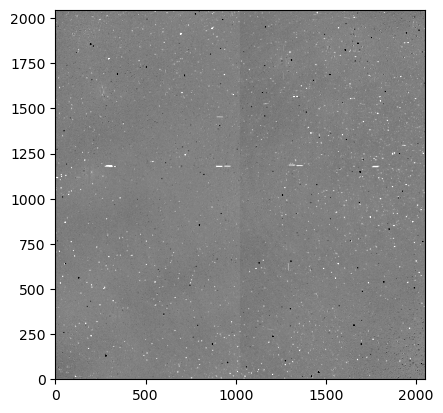

In [7]:
plt.figure()
FILE = '/nfs/php2/ar2/P/HP1/REDUCTION/SUB/1-20250201/ihu57/1-479969_57-sub.fits.fz' #'1-430769_57-sub.fits'
img = fits.getdata(FILE)
min_value, max_value = zscale.get_limits(img)
plt.imshow(img, vmin=min_value, vmax=max_value, origin='lower', cmap='gray')
#plt.title('ihu ', ihu)
plt.show()

Text(0, 0.5, 'Y')

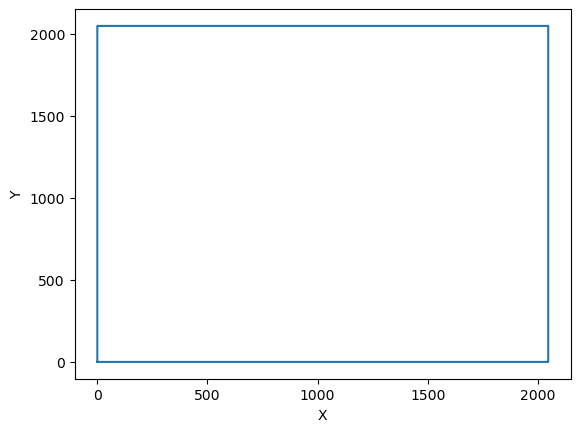

In [8]:


xpix = np.arange(0,2048,1)
ypix = np.arange(0,2048,1)
x0 = np.zeros(len(xpix))
x1 = np.ones(len(xpix)) * 2047
y0 = np.zeros(len(xpix))
y1 = np.ones(len(xpix)) * 2047

XPIX = np.concatenate((x0,xpix,x1,np.flip(xpix)))
YPIX = np.concatenate((ypix,y1,np.flip(ypix),y0))
plt.plot(XPIX,YPIX)
plt.xlabel('X')
plt.ylabel('Y')

In [15]:
hdr = fits.getheader(FILE)
shifted = hdr.get('WCSSHIFT', False)
shifted,hdr

(False,
 SIMPLE  =                    T / file does conform to FITS standard             
 BITPIX  =                   16 / number of bits per data pixel                  
 NAXIS   =                    0 / number of data axes                            
 EXTEND  =                    T / FITS dataset may contain extensions            
 COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H )

In [14]:
f[1].header['WCSSHIFT']

True

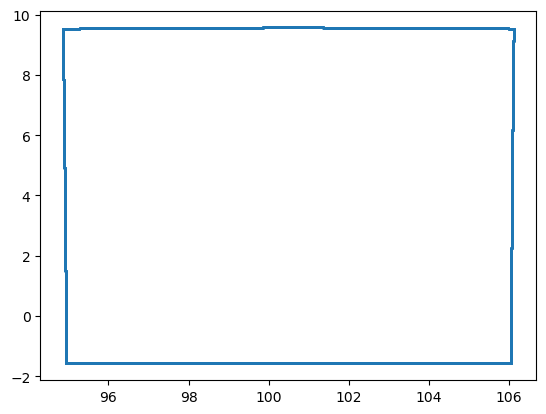

In [13]:
f = fits.open(FILE)
w = WCS(f[1].header)
RA, DEC = w.all_pix2world(XPIX,YPIX,1)
plt.scatter(RA,DEC,s=1)

In [179]:
ihufile


'/nfs/php2/ar2/P/HP1/REDUCTION/SUB/1-20250201/ihu64/1-479936_64-sub.fits.fz'

/nfs/php2/ar2/P/HP1/REDUCTION/SUB/1-20250201/ihu36/1-479936_36-sub.fits.fz does not exist


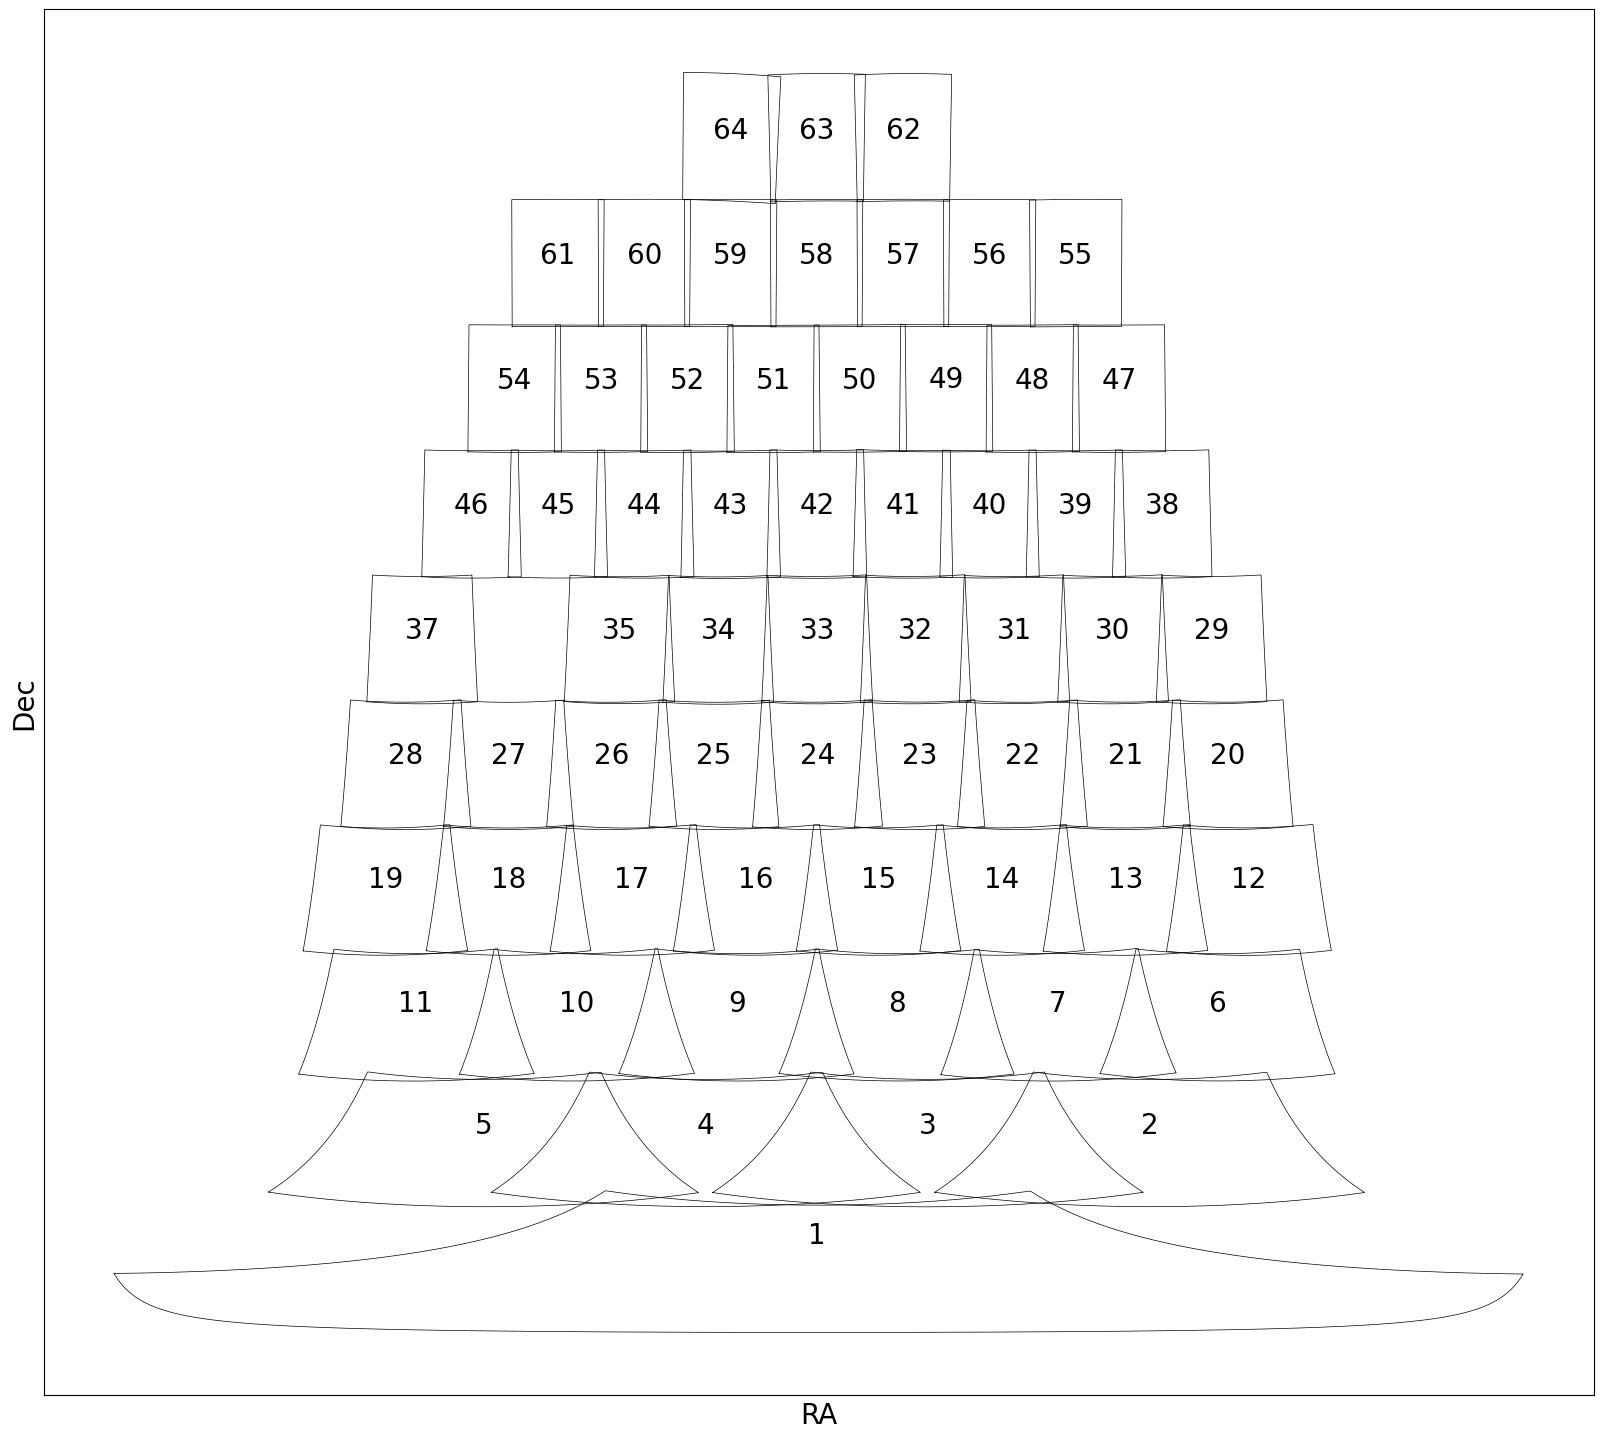

In [180]:
PLOT = False
RAs = []
DECs = []

fig, ax = plt.subplots(figsize=(20,18))
for ihu in range(64):
    try:
        ihufile = '/nfs/php2/ar2/P/HP1/REDUCTION/SUB/1-20250201/ihu{:02d}/1-479936_{:02d}-sub.fits.fz'.format(ihu+1,ihu+1) #20250201/ihu{:02d}/1-479936
        img = fits.getdata(ihufile)
        min_value, max_value = zscale.get_limits(img)
        f = fits.open(ihufile)
        if 'WCSSHIFT' in f[1].header:
            w = WCS(f[1].header)
            RA, DEC = w.all_pix2world(XPIX,YPIX,1)
            RAs.append(RA)
            DECs.append(DEC)
            plt.plot(RA,DEC,lw=0.5,color='k')
            plt.text(np.median(RA),np.median(DEC),ihu+1,fontsize=20,horizontalalignment='center')
        else:
            print('no WCSSHIFT for ', ihufile)
    except:
        print(ihufile + ' does not exist')
        continue

plt.xticks([])
plt.yticks([])
plt.xlabel('RA',fontsize=20)
plt.ylabel('Dec',fontsize=20)
RAs = np.array(RAs)
DECs = np.array(DECs)

In [178]:
# top, bottom, left, right
dict = {'ihu': np.arange(1,65,1),
        'top':[[5,4,3,2],[7,6],[8,7],[10,9],[11,10],[13,12],[14,13],[15,14],[17,16],[18,17],
              [19,18],[20],[21],[23,22],[24,23],[25,24],[26,25],[27],[28],[29],[30,29],[31,30],
               [32,31],[33],[35,34],[36,35],[37,36],[37],#<ihu28
               [38],[39,38],[40,39],[41,40],[42],[44,43],[45,44],[46,45],[46],#<ihu37
               [47],[48,47],[49,48],[50,49],[51,50],[52,51],[53,52],[54,53],[54],#<ihu46
               [55],[56,55],[57,56],[58,57],[59,58],[60,59],[61,60],[61],#<ihu54
               [0],[62],[62],[63],[64],[64],[0],[0],[0],[0]],
        'bottom': [[0],[1],[1],[1],[1],[2],[3,2],[4,3],[4,3],[5,4],[5],#<ihu11
                  [6],[7,6],[8,7],[9,8],[9,8],[10,9],[11,10],[11],#<ihu19
                   [13,12],[13],[14,13],[15,14],[16,15],[17,16],[18,17],[18],[19,18],#<ihu28
                   [21,20],[22,21],[23,22],[24,23],[24],[25,24],[26,25],[27,26],[28,27],#<ihu37
                   [30,29],[31,30],[32,31],[33,32],[33],[34,33],[35,34],[36,35],[37,36],#>ihu46
                   [39,38],[40,39],[41,40],[42,41],[43,42],[44,43],[45,44],[46,45],#<ihu54
                   [48,47],[49,48],[50,49],[51,50],[52,51],[53,52],[54,53],#<ihu61
                   [57],[58],[59]],
        'left':[[0],[3],[4],[5],[0],[7],[8],[9],[10],[11],[0],[13],[14],[15],[16],[17],[18],[19],[0],#<ihu19
                [21],[22],[23],[24],[25],[26],[27],[28],[0],[30],[31],[32],[33],[34],[35],[36],[37],[0],#<ihu37
                [39],[40],[41],[42],[43],[44],[45],[46],[0],[48],[49],[50],[51],[52],[53],[54],[0],#<ihu54
                [56],[57],[58],[59],[60],[61],[0],#<ihu61
                [63],[64],[0]],
        'right':[[0],[0],[2],[3],[4],[0],[6],[7],[8],[9],[10],[0],[12],[13],[14],[15],[16],[17],[18],#<ihu19
                 [0],[20],[21],[22],[23],[24],[25],[26],[27],#<ihu28
                 [0],[29],[30],[31],[32],[33],[34],[35],[36],#<ihu37
                 [0],[38],[39],[40],[41],[42],[43],[44],[45],#<ihu46
                 [0],[47],[48],[49],[50],[51],[52],[53],#<ihu54
                 [0],[55],[56],[57],[58],[59],[60],#<ihu61
                 [0],[62],[63]]}
df = pd.DataFrame(dict)
df.to_hdf('IHU_TABLE.hdf',key='data')

/tmp/ipykernel_1828527/4236321548.py:31: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['top', 'bottom', 'left', 'right'], dtype='object')]

  df.to_hdf('IHU_TABLE.hdf',key='data')
